In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("Mall_Customers.csv")

# 데이터 확인
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [31]:
# 결측치 처리
print(df.isnull().sum())  # 결측치 확인

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [32]:
from sklearn.preprocessing import StandardScaler

# Age, Annual Income, Spending Score 열만 스케일링
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# 스케일링 결과 DataFrame 생성
scaled_df = pd.DataFrame(scaled_data, columns=features)
print(scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


/Users/josuhyeon/homework/env1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josuhyeon/homework/env1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josuhyeon/homework/env1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josuhyeon/homework/env1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

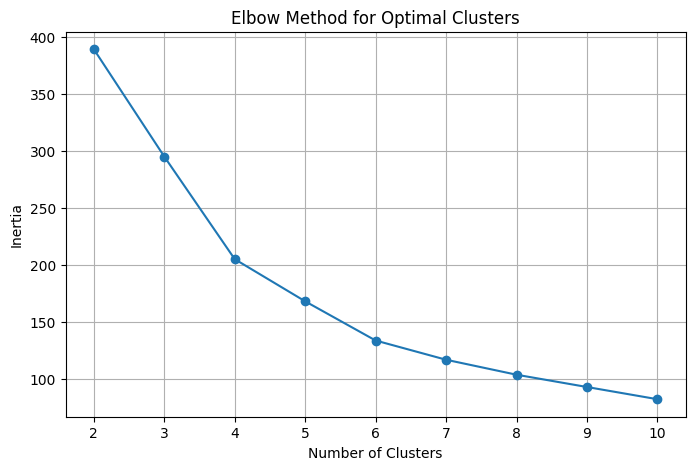

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 개수 범위 설정
cluster_range = range(2, 11)

# 각 클러스터 개수에서 inertia 저장
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # 표준화된 데이터 사용
    inertia.append(kmeans.inertia_)

# 엘보우 차트 시각화
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

클러스터 수 4 → 감소폭이 작아짐 (엘보우 지점)

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means 모델 생성 및 학습
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# 각 데이터 포인트의 클러스터 레이블
labels = kmeans.labels_

# 결과를 원래 데이터프레임에 추가
scaled_df['Cluster'] = labels

print(scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0 -1.424569           -1.738999               -0.434801        2
1 -1.281035           -1.738999                1.195704        2
2 -1.352802           -1.700830               -1.715913        2
3 -1.137502           -1.700830                1.040418        2
4 -0.563369           -1.662660               -0.395980        2


/Users/josuhyeon/homework/env1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


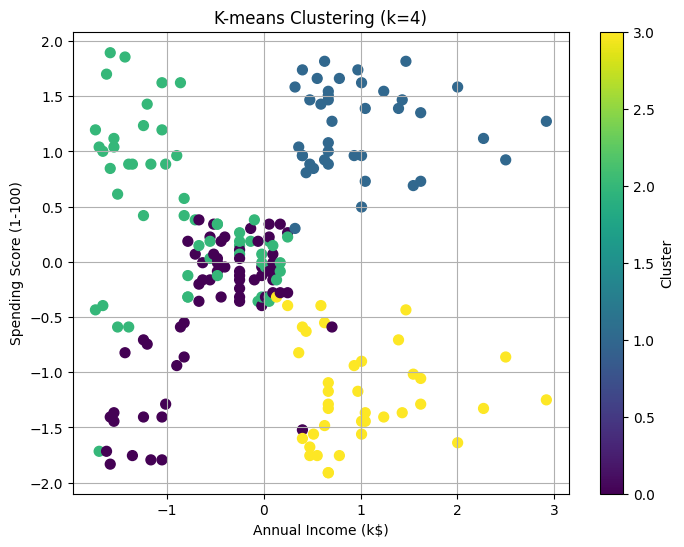

In [35]:
# 2D 시각화: Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['Annual Income (k$)'], scaled_df['Spending Score (1-100)'], 
            c=labels, cmap='viridis', s=50)  # 각 클러스터를 색으로 구분
plt.title('K-means Clustering (k=4)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

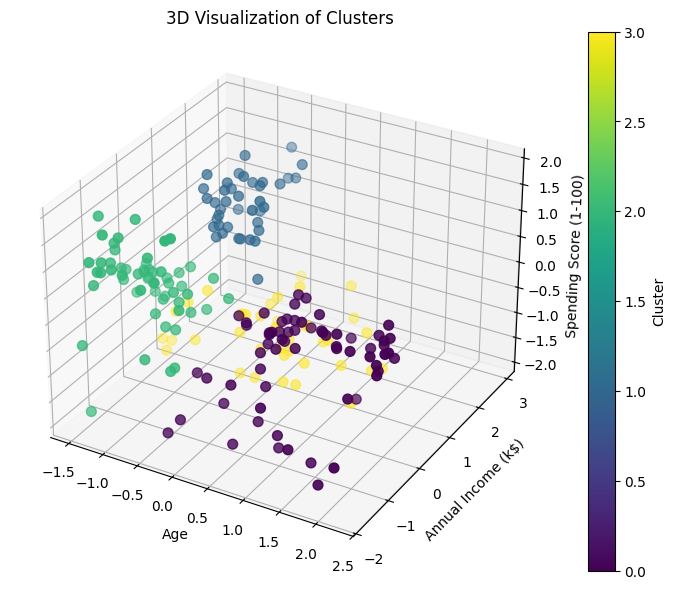

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D 플롯 생성
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도 그리기
scatter = ax.scatter(
    scaled_df['Age'], 
    scaled_df['Annual Income (k$)'], 
    scaled_df['Spending Score (1-100)'], 
    c=labels, 
    cmap='viridis', 
    s=50
)

# 축 설정
ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# 컬러바 추가
plt.colorbar(scatter, label='Cluster')
plt.show()